In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from init import readFile, split_dataset, error, reduce, CLASSES, FEATURES, plot_confusion_matrix
from k_nearest_neighbours import KNearestNeighbours, Algo

In [2]:
CLASSES = ["classA", "classB", "classC", "classD", "classE"]
data, output = readFile('data/data.csv', CLASSES)

In [3]:
data = reduce(data)

In [4]:
x_train, y_train, x_test, y_test = split_dataset(data, output)

In [5]:
knn = KNearestNeighbours.fit(x_train, y_train, 8, algo = Algo.BRUTE, leaf_size = 5)

In [ ]:
# print(knn.tree)

In [6]:
x_test_predict = knn.predict(x_test)

In [7]:
cf_mat = confusion_matrix(y_test, np.array(list(map(int, x_test_predict))))

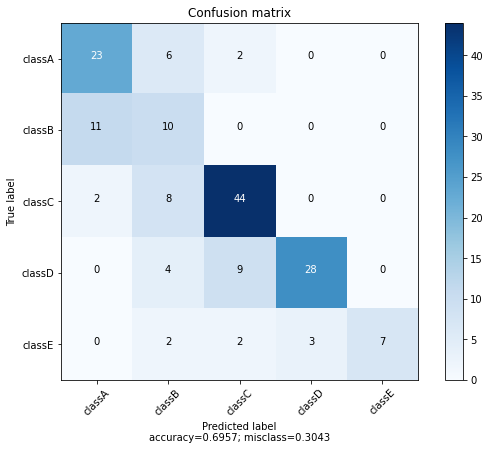

In [8]:
plot_confusion_matrix(cf_mat, CLASSES)

In [ ]:
# CLASSES = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
# FEATURES = ['sepal length (in cm)', 'sepal width (in cm)', 'petal length (in cm)', 'petal width (in cm)']
CLASSES = ["classA", "classB", "classC", "classD", "classE"]
data, output = readFile('data/data.csv', CLASSES)
k_values = np.arange(1, 20, 1, int)
errors = np.zeros(len(k_values))
for i in range(len(k_values)):
    for _ in range(50):
        x_train, y_train, x_test, y_test = split_dataset(data, output)
        knn = KNearestNeighbours.fit(x_train, y_train, k_values[i], algo=Algo.BRUTE, leaf_size=22)
        y_pred = knn.predict(x_test)
        errors[i] += error(y_test, y_pred)

In [ ]:
plt.plot(k_values, errors)